In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
import random
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
boston_dataset = load_boston()

In [3]:
X = load_boston().data
Y = load_boston().target

In [4]:
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [5]:
#divide data into train test split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3 )

In [6]:
print(y_train.shape)

(354,)


In [7]:
print(x_train.shape[0])
print(type(x_train))

354
<class 'numpy.ndarray'>


In [8]:
scaler = preprocessing.StandardScaler()
X_train_new = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [87]:
clf = SGDRegressor()
clf.fit(X_train_new, y_train)
print(mean_squared_error(y_test, clf.predict(X_test)))

23.718268595237557


In [88]:
clf.coef_

array([-0.71543141,  0.6543503 , -0.66128593,  0.93723537, -0.84045527,
        3.06349127, -0.10600654, -2.11167493,  0.79198836, -0.4391723 ,
       -1.81004756,  0.89808975, -3.32526723])

In [44]:
def stochastic_gradient_descent():
    loss_list = []
    learning_rate = 0.01
    epochs = 500
    lr_rate_variation = 'constant'
    initial_w = np.random.randn(13,1)
    initial_b = np.random.randn(1,1)
    for epoch in range(1,epochs+1):
        sum_errors = 0
        N = X_train_new.shape[0]
        for i in range(N):
            random_array = np.random.randint(1, X_train_new.shape[0])
            random_x_sample = X_train_new[random_array,:].reshape(1,X_train_new.shape[1])
            random_y_sample = y_train[random_array].reshape(1,1)

            y_pred = np.dot(random_x_sample,initial_w) + initial_b
            loss = y_pred - random_y_sample
            sum_errors += loss**2
        
            w_gradient = np.dot(random_x_sample.T, (y_pred - random_y_sample))
            b_gradient = (y_pred - random_y_sample)
            
            initial_w = initial_w -(2/N)*learning_rate*(w_gradient)
            initial_b = initial_b - (2/N)*learning_rate*(b_gradient)
        loss_list.append(float(sum_errors/N))    
    return loss_list, initial_w, initial_b
loss_list, w, b = stochastic_gradient_descent()

In [96]:
def predict_val(X_test, w, b):
    X_test=np.array(X_test)
    y_pred =[]
    for i in range(0,len(X_test)):
        y=np.asscalar(np.dot(w,X_test[i]) + b)
        y_pred.append(y)
    return np.array(y_pred)

In [97]:
y_pred = predict_val(X_test, w.T, b)
mse=mean_squared_error(y_test,y_pred)
mse

23.30175563982442

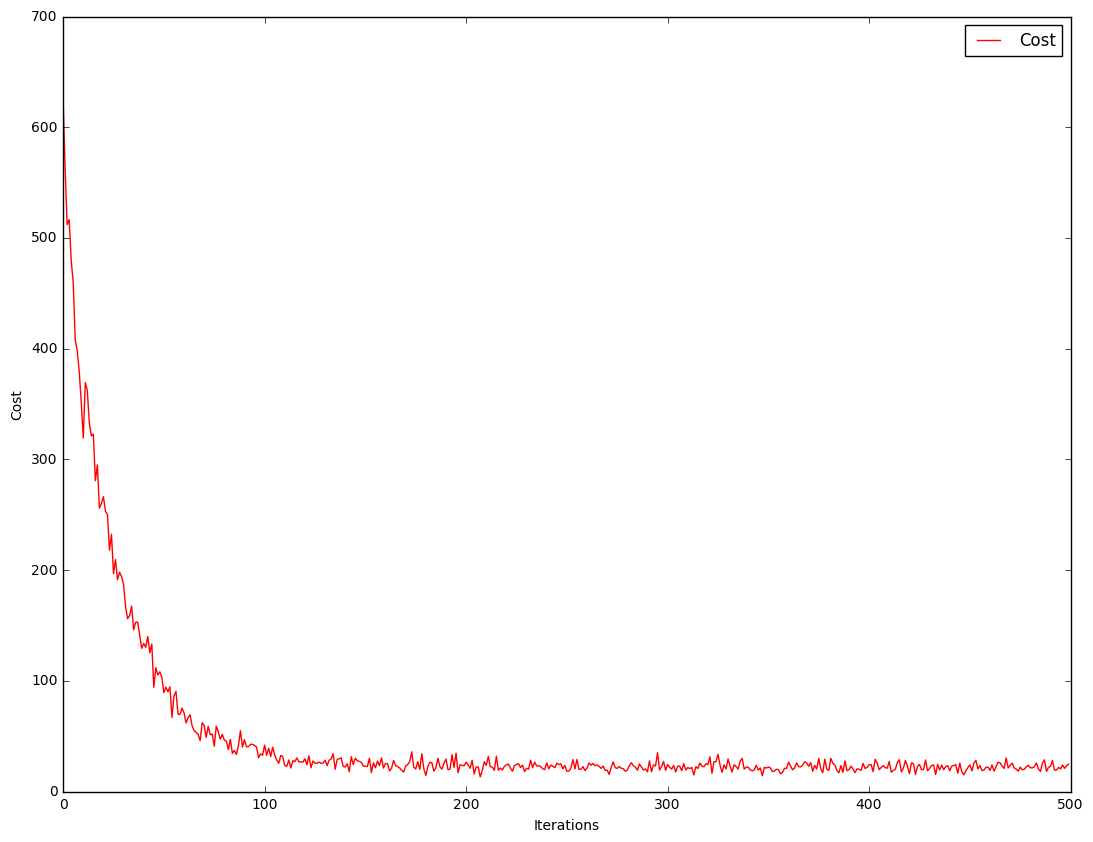

In [100]:
plt.figure(figsize=(13, 10))
plt.plot(loss_list, label="Cost", color='red')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
# plt.xscale('log')

plt.show()

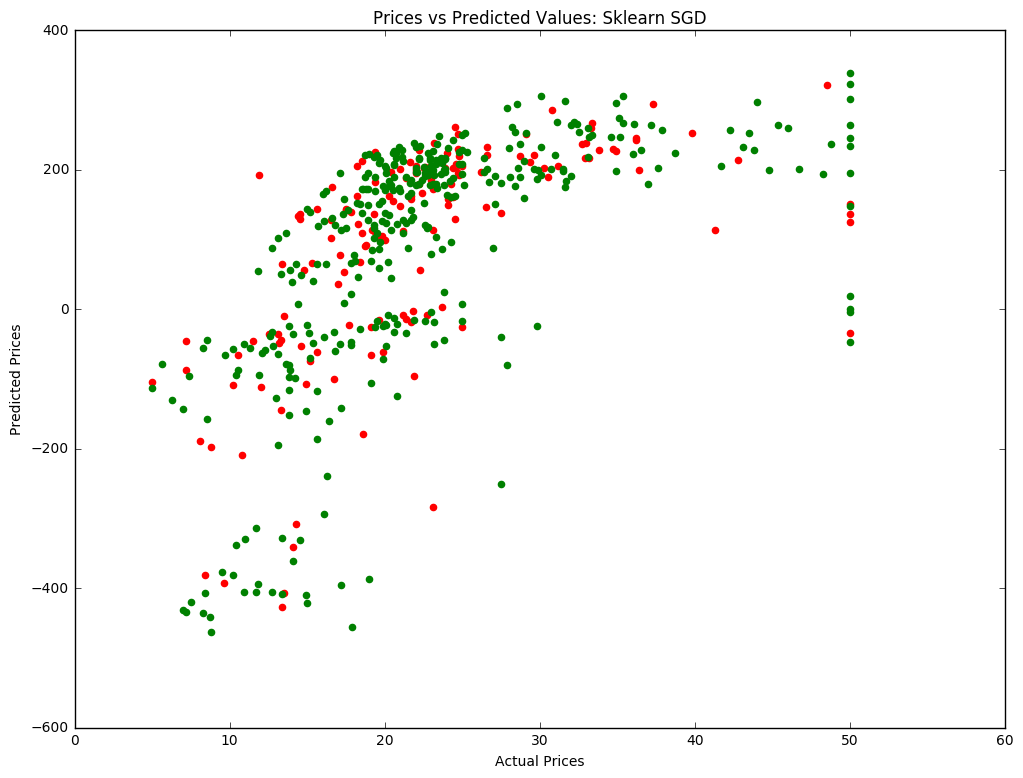

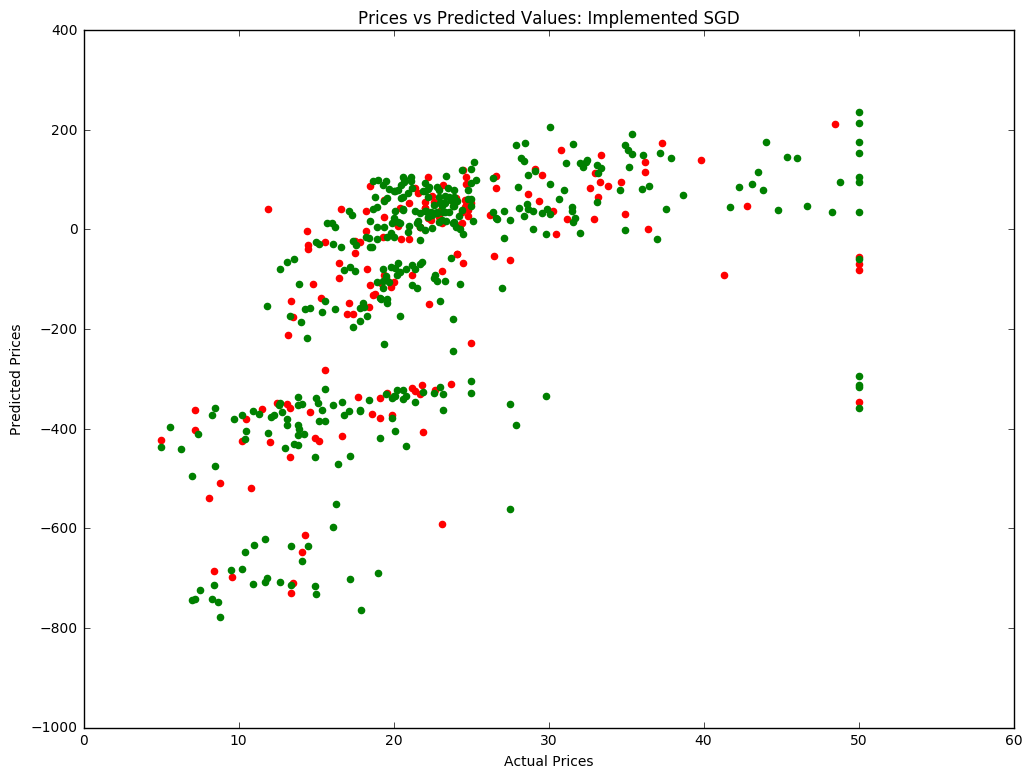

In [57]:
# Prices vs Predicted Values plot
#Sklearn SGD
plt.figure(figsize=(12, 9))
plt.scatter(y_test, clf.predict(x_test), color = 'red')
plt.scatter(y_train, clf.predict(x_train), color = 'green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Values: Sklearn SGD")
plt.show()

#Implemented SGD
plt.figure(figsize=(12, 9))
plt.scatter([y_test], [(np.dot(x_test, w) + b)], color = 'red')
plt.scatter([y_train], [(np.dot(x_train, w) + b)], color = 'green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Values: Implemented SGD")
plt.show()

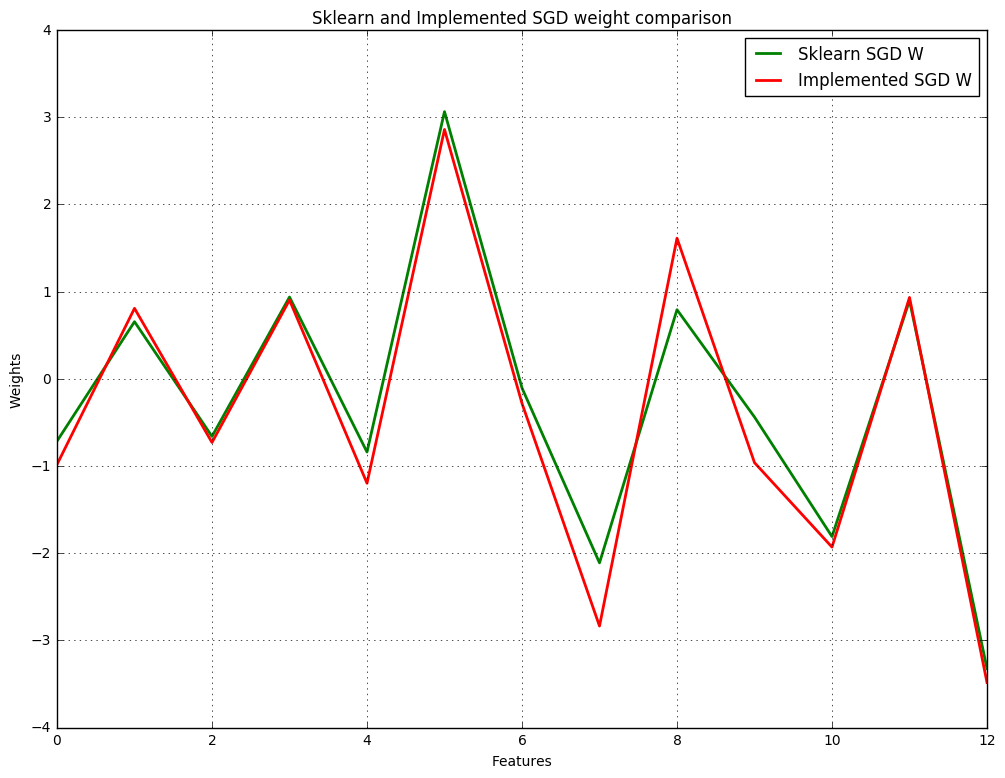

In [90]:
# Sklearn and Implemented SGD weight comparison
# print("Learning Rate : ",learning_rate)
plt.figure(figsize=(12, 9))
plt.plot(range(len(w)), clf.coef_, color='green', lw=2, label='Sklearn SGD W')
plt.plot(range(len(w)), w, color='red', lw=2, label='Implemented SGD W')
plt.xlabel('Features')
plt.ylabel('Weights')
plt.legend(loc="upper right")
plt.title("Sklearn and Implemented SGD weight comparison")
plt.grid(True,color='black')
plt.show()

In [89]:
from prettytable import PrettyTable
pt = PrettyTable()
pt.field_names = ["Model","Weights", "Test Data MSE"]
pt.add_row(["Sklearn SGD", '''array([-0.71543141,  0.6543503 , -0.66128593,  0.93723537, -0.84045527,
        3.06349127, -0.10600654, -2.11167493,  0.79198836, -0.4391723 ,
       -1.81004756,  0.89808975, -3.32526723])''' ,23.71])
pt.add_row(["Implemented SGD", '''array([-0.95427313,  0.81197938, -1.06704706,  0.91124555, 
        -1.07481613, 2.94580324, -0.40702141, -2.92119034, 0.94381401, 
        -0.27170656, -1.84986383,  0.93604764, -3.3399794 ])''', 23.30])
print(pt)

+-----------------+-------------------------------------------------------------------------+---------------+
|      Model      |                                 Weights                                 | Test Data MSE |
+-----------------+-------------------------------------------------------------------------+---------------+
|   Sklearn SGD   | array([-0.71543141,  0.6543503 , -0.66128593,  0.93723537, -0.84045527, |     23.71     |
|                 |         3.06349127, -0.10600654, -2.11167493,  0.79198836, -0.4391723 , |               |
|                 |                     -1.81004756,  0.89808975, -3.32526723])             |               |
| Implemented SGD |       array([-0.95427313,  0.81197938, -1.06704706,  0.91124555,        |      23.3     |
|                 |         -1.07481613, 2.94580324, -0.40702141, -2.92119034, 0.94381401,  |               |
|                 |               -0.27170656, -1.84986383,  0.93604764, -3.3399794 ])      |               |
+---------

# Procedure followed

1. Loaded the test and train datasets
2. Implemented the sklearn implementation of SGDRegressor
3. Calculated the mse using own method
4. Compared the weigths of both implementation